# Calculations of $g^{(2)}(\omega_1,\omega_2)$ for a squeezed laser

In [1]:
from qutip import *
import numpy as np
from numpy import sqrt
import time
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

from TPS_simulation import *
from plot_functions import *

In [2]:
#qutip.settings.num_cpus = 14

Definition of parameters

In [3]:
g = 1
ratio = 0.01
C = 1.
P = sqrt(4/(C*ratio))
kappa = ratio*P
gsens = 0.0001
Gamma = 0.01

# Squeezing parameter
r = 0.4

# Truncation parameter
Ncav = 30

In [4]:
sim = simulation()

Delta1 = -0.5; Delta2 = 0.5;
DeltaPair = [Delta1,Delta2]

# Test
#sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r)

In [5]:
nw = 21
wgrid = np.linspace(-.1,0.1,nw)

# 1D list
DeltaList=list(zip(wgrid,-wgrid))

# 2D list
DeltaList2D = []
for Delta1 in wgrid:
    for Delta2 in wgrid:
        DeltaList2D.append([Delta1,Delta2])

## Calculations for squeezed laser

In [6]:
r=0.4

In [8]:
g2Antidiag = np.array([sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r) for DeltaPair in tqdm(DeltaList)])

 18%|█▊        | 2/11 [00:27<02:03, 13.77s/it]

In [ ]:
g2AntidiagParallel = np.array(parallel_map(sim.g2g1,DeltaList,(g,gsens,kappa,P,Gamma,r)))

## 2D calculation

In [7]:
g2w1w2 = np.array([sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r) for DeltaPair in tqdm(DeltaList2D)])

 54%|█████▎    | 237/441 [54:13<45:45, 13.46s/it]  

KeyboardInterrupt: 

In [ ]:
g2w1w22D = g2w1w2.reshape((nw,nw))

In [ ]:
np.save(f'Results/g2_w1w2_2D-r-{r}-nw-{nw}',g2w1w22D)

In [61]:
orig_cmap=orig_cmap = matplotlib.cm.coolwarm
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0., name='shifted')

plt.imshow(g2w1w22D.T, interpolation="none", cmap=shifted_cmap)
plt.colorbar()
plt.show()

NameError: name 'np' is not defined

In [59]:
CSIviolation = np.zeros((nw,nw))

for i in range(nw):
    for j in range(nw):
        CSIviolation[i,j]=g2w1w22D[i,j]/sqrt(g2w1w22D[i,i]*g2w1w22D[j,j])

np.max(CSIviolation)

1.0

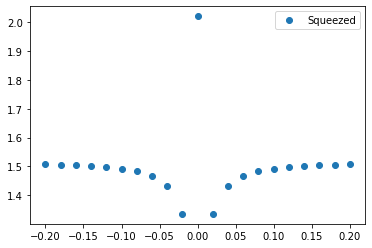

In [24]:
plt.plot(wgrid,g2Antidiag,'o',label="Squeezed")
plt.legend()
plt.show()

In [8]:
g2Antidiag_r0 = np.array([sim.g2g1(DeltaPair,g,gsens,kappa,P,Gamma,r=0) for DeltaPair in tqdm(DeltaList)])

100%|██████████| 30/30 [04:22<00:00,  8.76s/it]


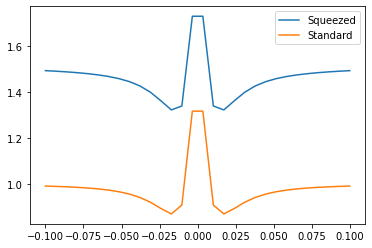

In [10]:
plt.plot(wgrid,g2Antidiag,label="Squeezed")
plt.plot(wgrid,g2Antidiag_r0,label="Standard")
plt.legend()
plt.show()